# TP1: Composição Chroma Key

In [1769]:
%reset

import matplotlib.pyplot as plt
import skimage.exposure  as skie
import numpy             as np
import seaborn           as sns
import skimage           as sk
import skimage.io        as io
import skimage.color     as color

from skimage.transform import rescale, rotate
from skimage           import img_as_float, filters, exposure
from skimage.draw      import set_color
from skimage.util      import crop
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Função que mostra uma imagem:

In [1770]:
def show(img):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    ax.set_axis_off()
    plt.show()

Histograma do H em hsv:

In [1771]:
def hist_h(img,intensidade,x1,x2):
    plt.hist(img[:,:,0].flatten(),256)
    plt.xlim((x1,x2))
    plt.ylim((0,intensidade))
    plt.show()

Função que define uma máscara True e False com H no intervalo maior>h>menor:

In [1772]:
def mascara(hsv,maior,menor):
    h, s, v = np.rollaxis(hsv, axis=-1)
    return (maior>h) & (h>menor)


Função que sobrepõe img com máscara mask1 em um fundo a partir das posições x e y:

In [1773]:
def sobrepor(x,y,background,img,mask1):
    mask_background = np.ones((background.shape[0],background.shape[1]), dtype=bool)
    mask_background[x:(mask1.shape[0]+x),y:(mask1.shape[1]+y)] = mask1
    background2 = background.copy()
    for i in range(3):
        img_aux = np.ma.array(img[:,:,i],mask=mask1)
        np.place(background2[:,:,i],~mask_background,img_aux.compressed())
    return background2

Imagem de fundo:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


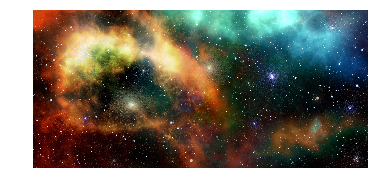

In [1774]:
background = rescale(io.imread('universe-2742113_1920.jpg'),1)  
#background = crop(background,((0,0),(0,500),(0,0)))
show(background)

In [1775]:
background.shape

(904, 1920, 3)

### Método para o Chroma Key

O método para retirada do Chroma Key e inserção será apresentado para a imagem do gato e em seguida aplicado para as outras imagens.

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


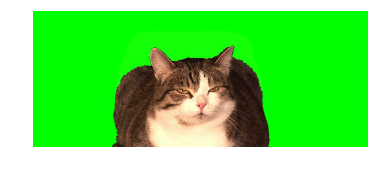

In [1776]:
n=1.5
#n é a escala só pra testar sem ficar mto lento, depois mudar pra 1
gato = rescale(io.imread('cat.jpg'),n)
gato = crop(gato,((0,200),(0,0),(0,0)))
show(gato)

Transforma a imagem em hsv e aplica a função que dá o histograma de H nesse espaço de cor:

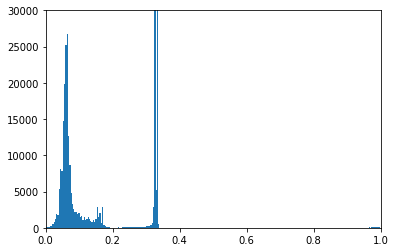

In [1777]:
gatohsv = color.rgb2hsv(gato)
hist_h(gatohsv,30000,0,1)

Zoom no pico de intensidade maior para identificar o intervalo com o verde de fundo:

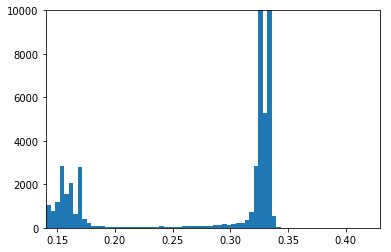

In [1778]:
hist_h(gatohsv,10000,0.14,0.43)


A partir do histograma acima temos que o  verde do fundo tem Hue entre 0.28 e 0.37

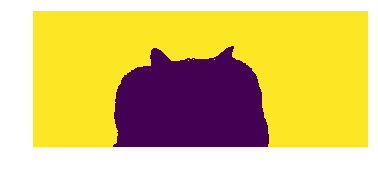

In [1779]:
maskgato = mascara(gatohsv,0.35,0.20)
show(maskgato)

O posicionamento da imagem centralizada será definido por:

In [1780]:
x = int((background.shape[1]-gato.shape[1]))
y = int((background.shape[0]-gato.shape[0]))

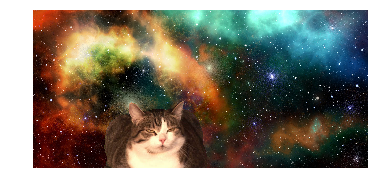

In [1781]:
backgroundgato = sobrepor(384,100,background,gato,maskgato)
show(backgroundgato)

#### Segundo gato:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


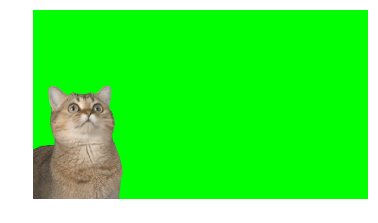

In [1782]:
gato2 = rescale(io.imread('cat4.jpg'),n)   
show(gato2)

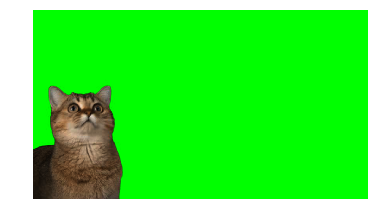

In [1783]:
#gato2 = filters.gaussian(gato2, multichannel = True)
gato2esc = exposure.adjust_gamma(gato2, 2)
show(gato2esc)

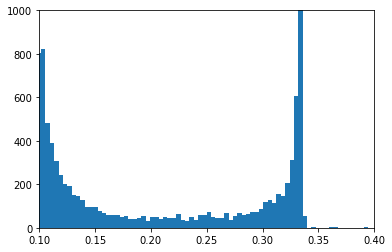

In [1784]:
gato2hsv = color.rgb2hsv(gato2esc)

hist_h(gato2hsv,1000,0.1,0.4)

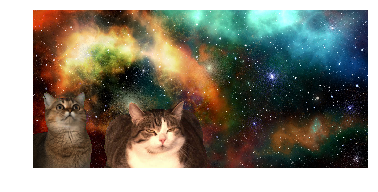

In [1785]:
maskgato2 = mascara(gato2hsv,0.35,0.25)
bg_gato2 = sobrepor(183,0,backgroundgato,gato2esc,maskgato2)
show(bg_gato2)

#### Keyboard cat

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


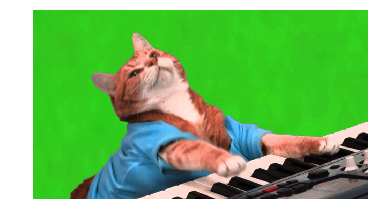

In [1786]:
gato3 = rescale(io.imread('cat6.jpg'),0.5)   
gato3esc = exposure.adjust_gamma(gato3, 1.3)

show(gato3esc)


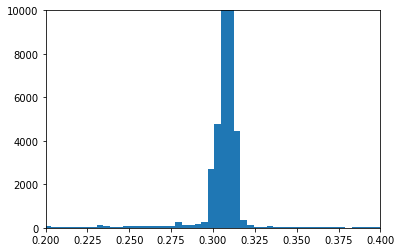

In [1787]:
gato3hsv = color.rgb2hsv(gato3)

hist_h(gato3hsv,10000,0.2,0.4)

In [1788]:
p1 = bg_gato2.shape[1]-gato3.shape[1]
p2 = bg_gato2.shape[0]-gato3.shape[0]

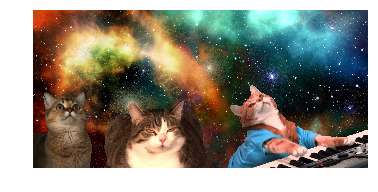

In [1789]:
maskgato3 = mascara(gato3hsv,0.4,0.2)
bg_gato3 = sobrepor(p2,p1,bg_gato2,gato3esc,maskgato3)
show(bg_gato3)

## Adicionando outras imagens

#### Bananas:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


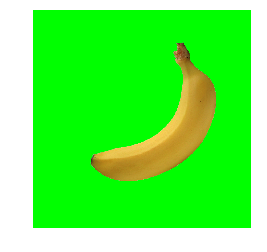

In [1790]:
banana = rescale(io.imread('banana.jpg'),n*0.4)   
show(banana)

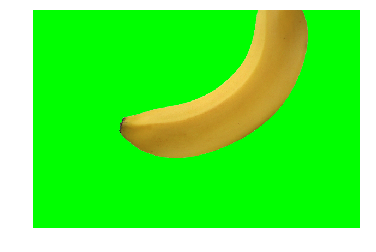

In [1791]:
bananacrop = crop(banana,((200,0),(0,0),(0,0)))
show(bananacrop)

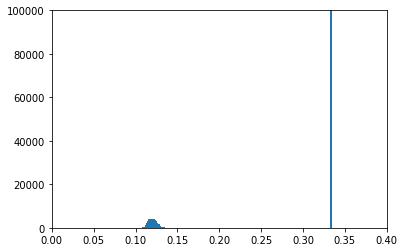

In [1792]:
bananahsv = color.rgb2hsv(bananacrop)
hist_h(bananahsv,100000,0,0.4)

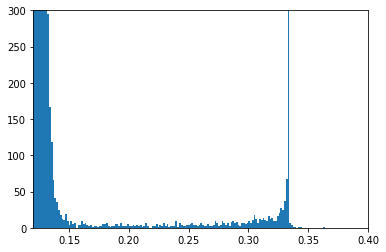

In [1793]:
hist_h(bananahsv,300,0.12,0.4)

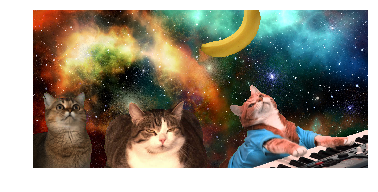

In [1794]:
maskbanana = mascara(bananahsv,0.35,0.2)
bg_banana1 = sobrepor(0,800,bg_gato3,bananacrop,maskbanana)
show(bg_banana1)


A segunda banana será girada com a função rotate e cortada com a função crop:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


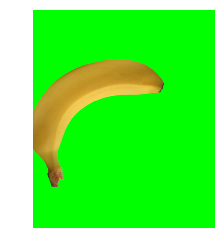

In [1795]:
banana2 = rotate(banana,170,resize=False,mode='edge')
banana2 = rescale(crop(banana2,((0,0),(100,0),(0,0))),1.1)
show(banana2)

In [1796]:
banana2hsv = color.rgb2hsv(banana2)
maskbanana2 = mascara(banana2hsv,0.35,0.2)

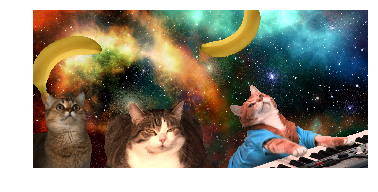

In [1797]:
bg_banana2 = sobrepor(0,0,bg_banana1,banana2,maskbanana2)
show(bg_banana2)

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


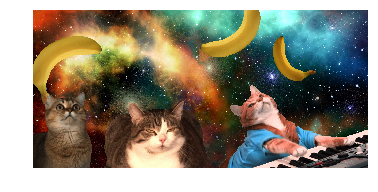

In [1798]:
banana3 = rotate(banana,260,resize=False,mode='edge')
banana3 = rescale(banana3,0.7)
banana3hsv = color.rgb2hsv(banana3)
maskbanana3 = mascara(banana3hsv,0.35,0.2)
banana3escuro = exposure.adjust_gamma(banana3, 1.5)

bg_banana3 = sobrepor(50,1280,bg_banana2,banana3escuro,maskbanana3)
show(bg_banana3)

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


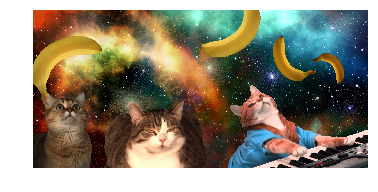

In [1799]:
banana4 = rotate(banana,85,resize=False,mode='edge')
banana4 = rescale(banana4,0.5)
banana4hsv = color.rgb2hsv(banana4)
maskbanana4 = mascara(banana4hsv,0.35,0.2)
banana4esc = exposure.adjust_gamma(banana4, 2)

bg_banana4 = sobrepor(200,1550,bg_banana3,banana4esc,maskbanana4)

show(bg_banana4)

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


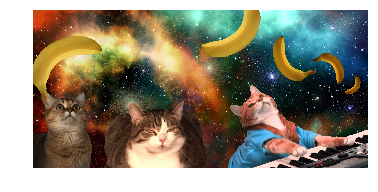

In [1800]:
banana5 = rotate(banana,10,resize=False,mode='edge')
banana5 = rescale(banana5,0.3)
banana5hsv = color.rgb2hsv(banana5)
maskbanana5 = mascara(banana5hsv,0.35,0.2)
banana5esc = exposure.adjust_gamma(banana5, 2.2)

bg_banana5 = sobrepor(340,1730,bg_banana4,banana5esc,maskbanana5)

show(bg_banana5)


/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


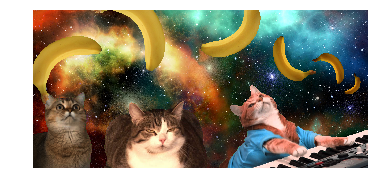

In [1801]:
banana6 = rotate(banana,80,resize=False,mode='edge')
banana6 = crop(rescale(banana6,1.2),((200,0),(0,0),(0,0)))
banana6hsv = color.rgb2hsv(banana6)
maskbanana6 = mascara(banana6hsv,0.35,0.2)
banana6esc = exposure.adjust_gamma(banana6, 0.9)

bg_banana6 = sobrepor(0,200,bg_banana5,banana6esc,maskbanana6)

show(bg_banana6)


In [1802]:
final = filters.gaussian(bg_banana6,multichannel = True)

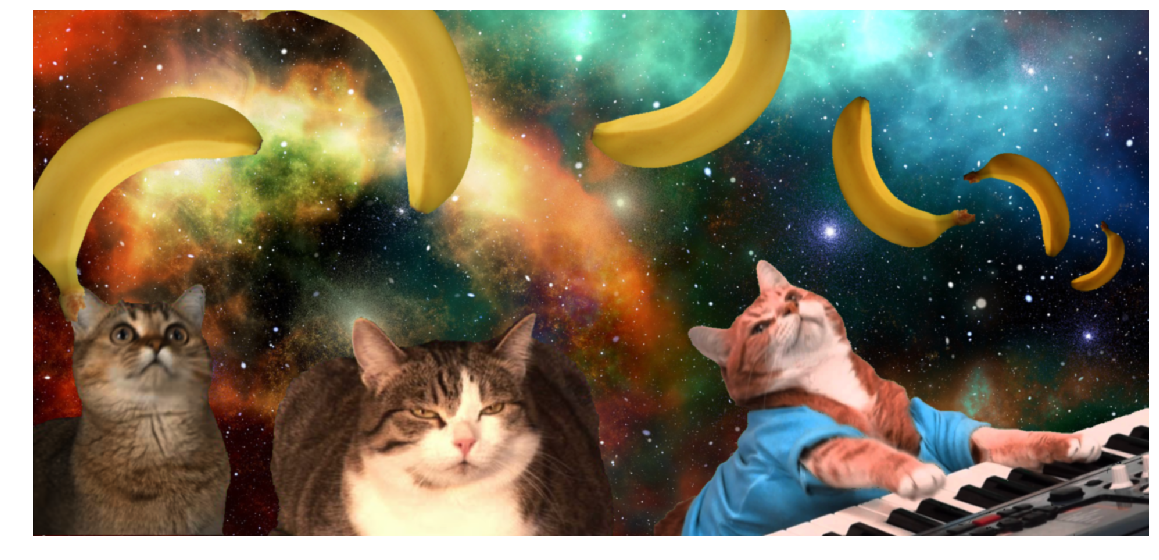

In [1803]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
ax.imshow(final)
ax.set_axis_off()
plt.savefig('final.png', transparent = True, bbox_inches='tight', pad_inches = 0)